Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,126,410 (4.30 MB)

 Trainable params: 1,126,026 (4.30 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 107ms/step - accuracy: 0.2487 - loss: 2.2077 - val_accuracy: 0.4287 - val_loss: 1.5779
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.4228 - loss: 1.5831 - val_accuracy: 0.5199 - val_loss: 1.3599
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.5042 - loss: 1.3758 - val_accuracy: 0.5863 - val_loss: 1.1926
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.5391 - loss: 1.2826 - val_accuracy: 0.6029 - val_loss: 1.1095
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.5704 - loss: 1.2074 - val_accuracy: 0.6628 - val_loss: 1.0041
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.5990 - loss: 1.1336 - val_accuracy: 0.6700 - val_loss: 0.9590
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6214 - loss: 1.0776 - val_accuracy: 0.6747 - val_loss: 0.9771
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.6390 - loss: 1

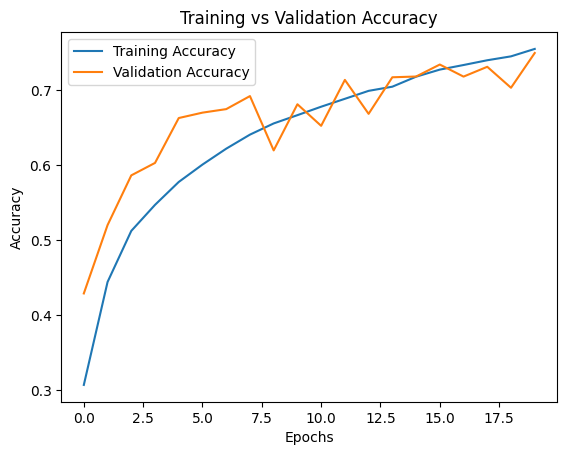


✅ Test Accuracy: 0.7496


In [3]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Activation, Flatten, Conv2D, MaxPooling2D, 
    Dropout, BatchNormalization
)
from tensorflow.keras.utils import to_categorical

# ✅ Set Path to Extracted CIFAR-10 Dataset
DATASET_PATH = r"D:\FDS\cifar-10-python\cifar-10-batches-py"  

# ✅ Function to Load CIFAR-10 Data
def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
    images = data_dict[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    labels = np.array(data_dict[b'labels'])
    return images, labels

# ✅ Load Training Data (5 Batches)
train_X, train_Y = [], []
for i in range(1, 6):  
    images, labels = load_cifar10_batch(os.path.join(DATASET_PATH, f'data_batch_{i}'))
    train_X.append(images)
    train_Y.append(labels)
train_X, train_Y = np.concatenate(train_X), np.concatenate(train_Y)

# ✅ Load Test Data
test_X, test_Y = load_cifar10_batch(os.path.join(DATASET_PATH, 'test_batch'))

# ✅ Normalize Data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# ✅ One-Hot Encode Labels
train_Y_one_hot = to_categorical(train_Y, num_classes=10)
test_Y_one_hot = to_categorical(test_Y, num_classes=10)

# ✅ Build CNN Model
model = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# ✅ Compile Model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# ✅ Display Model Summary
model.summary()

# ✅ Train the Model
history = model.fit(
    train_X, train_Y_one_hot, 
    validation_data=(test_X, test_Y_one_hot), 
    epochs=20, batch_size=64, verbose=1
)

# ✅ Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# ✅ Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.7691 - loss: 0.6589 - val_accuracy: 0.6672 - val_loss: 1.1872
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.7748 - loss: 0.6513 - val_accuracy: 0.7561 - val_loss: 0.7716
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.7839 - loss: 0.6310 - val_accuracy: 0.7283 - val_loss: 0.8730
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.7788 - loss: 0.6259 - val_accuracy: 0.7557 - val_loss: 0.7728
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.7955 - loss: 0.5884 - val_accuracy: 0.7393 - val_loss: 0.8163
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.7948 - loss: 0.5879 - val_accuracy: 0.7507 - val_loss: 0.7577
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.7943 - loss: 0.5938 - val_accuracy: 0.7527 - val_loss: 0.7562
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.8042 - loss: 0

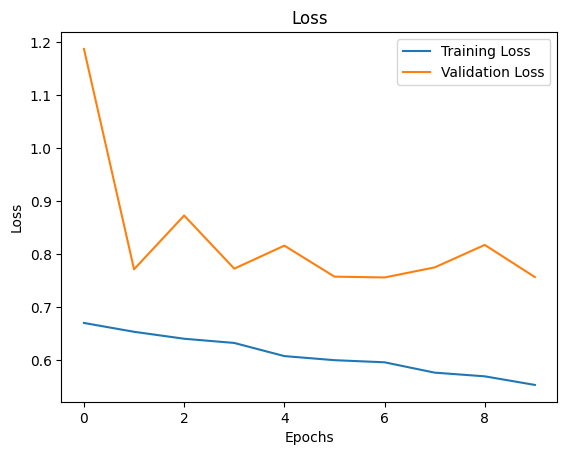

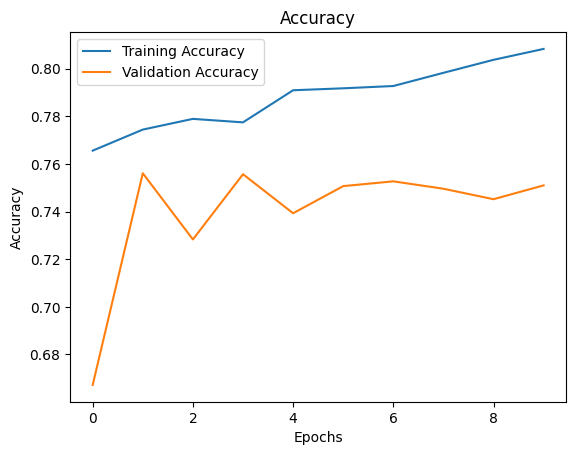

In [5]:
# Train the model
history = model.fit(
    train_X, 
    train_Y_one_hot, 
    batch_size=64, 
    epochs=10, 
    validation_data=(test_X, test_Y_one_hot)
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
# Evaluate the model on the test data
score = model.evaluate(
    test_X[0:100], 
    test_Y_one_hot[0:100], 
    verbose=1
)

# Print the test accuracy
print('\nKeras CNN Test Accuracy:', score[1], '\n')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8311 - loss: 0.5065

Keras CNN Test Accuracy: 0.8199999928474426 



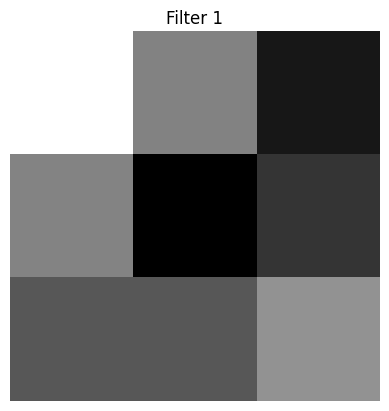

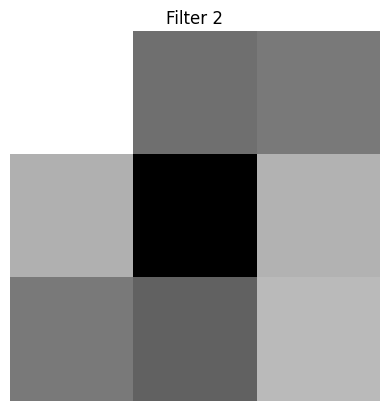

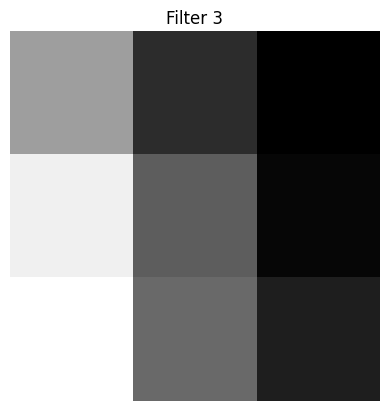

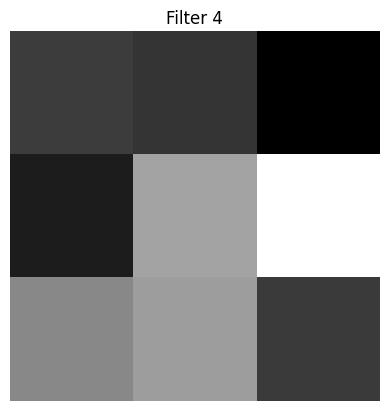

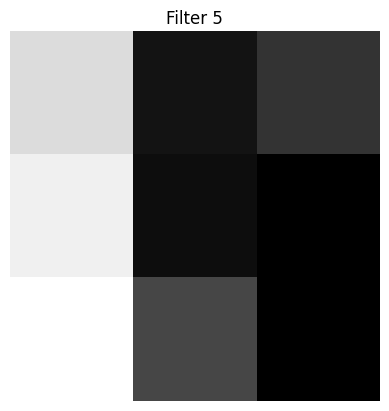

In [8]:
# Get filters and biases of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Visualize the first 5 filters
for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    plt.show()
    

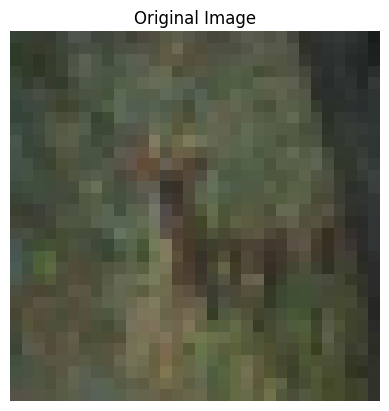

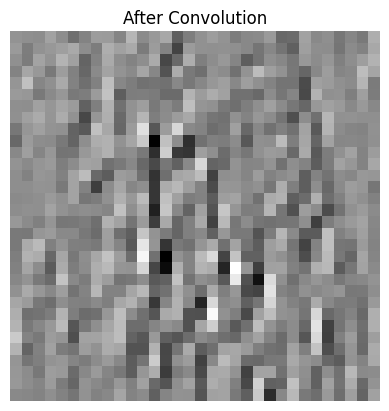

In [9]:
from scipy import signal

# Select an image from the training set
im = train_X[10]
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Perform convolution using one of the filters
output = signal.convolve2d(
    im.reshape(32, 32, 3)[:, :, 0],  # Using the first channel for grayscale effect
    filters[:, :, 0, 1].reshape(3, 3), 
    boundary='symm', 
    mode='same'
)

# Display the convolved image
plt.imshow(output, cmap='gray')
plt.title('After Convolution')
plt.axis('off')
plt.show()


In [13]:
import os
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# ✅ Set dataset path (update this based on your extracted folder)
DATASET_PATH = r"D:\FDS\cifar-10-python\cifar-10-batches-py" 

# ✅ Function to load CIFAR-10 batches
def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
    images = data_dict[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    labels = np.array(data_dict[b'labels'])
    return images, labels

# ✅ Load Training Data
train_X, train_Y = [], []
for i in range(1, 6):
    images, labels = load_cifar10_batch(os.path.join(DATASET_PATH, f'data_batch_{i}'))
    train_X.append(images)
    train_Y.append(labels)
train_X, train_Y = np.concatenate(train_X), np.concatenate(train_Y)

# ✅ Load Test Data
test_X, test_Y = load_cifar10_batch(os.path.join(DATASET_PATH, 'test_batch'))

# ✅ Normalize the Data
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

# ✅ One-Hot Encode Labels
train_Y_one_hot = to_categorical(train_Y, num_classes=10)
test_Y_one_hot = to_categorical(test_Y, num_classes=10)

# ✅ Build Fully Connected Neural Network
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# ✅ Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Train the Model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=20, validation_split=0.2)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2630 - loss: 2.0285 - val_accuracy: 0.3402 - val_loss: 1.7984
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3740 - loss: 1.7303 - val_accuracy: 0.4055 - val_loss: 1.6657
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4126 - loss: 1.6282 - val_accuracy: 0.4280 - val_loss: 1.6035
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4424 - loss: 1.5641 - val_accuracy: 0.4497 - val_loss: 1.5696
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4582 - loss: 1.5142 - val_accuracy: 0.4602 - val_loss: 1.5221
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4657 - loss: 1.4784 - val_accuracy: 0.4376 - val_loss: 1.5909
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4814 - loss: 1.4498 - val_accuracy: 0.4700 - val_loss: 1.4944
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4959 - loss: 1.4064 - val_a

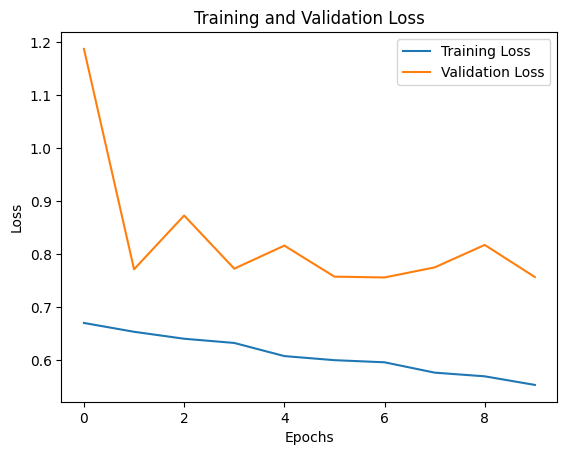

In [11]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_X, test_Y_one_hot, verbose=1)

# Display test metrics
print(f'\nTest Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7516 - loss: 0.7564

Test Loss: 0.7570146918296814
Test Accuracy: 0.7509999871253967
